# Descriptive statistics of labeled images
Using [pandas](https://pandas.pydata.org/) and [numpy](https://numpy.org), we can do basic descriptive statistics. Before we start, we derive some measurements from an labeled image.

In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread, imshow
from napari_segment_blobs_and_things_with_membranes import gauss_otsu_labeling
from skimage.measure import regionprops_table

We load the image using [scikit-image's `imread`](https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread) and segment it using [Gauss-Otsu-Labeling](Image_segmentation.Gauss-Otsu-Labeling). 

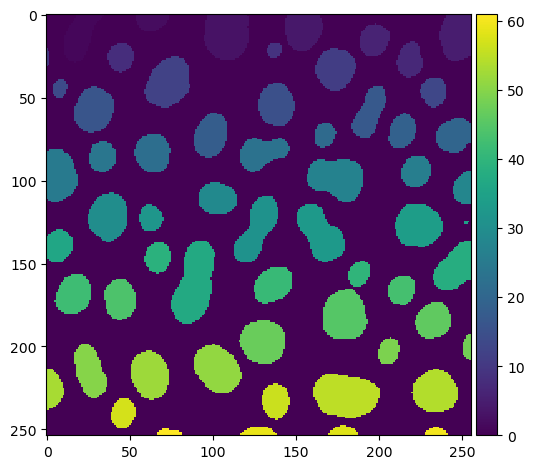

In [5]:
image = imread('../../data/blobs.tif')
labels = np.asarray(gauss_otsu_labeling(image))
imshow(labels)

From the labeled image we can derive descriptive intensity, size and shape statistics using [scikit-image's `regionprops_table`](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops_table). 
For post-processing the measurements, we turn them into a [pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [6]:
table = regionprops_table(labels, image, properties=['area', 'minor_axis_length', 'major_axis_length', 'eccentricity', 'feret_diameter_max'])
data_frame = pd.DataFrame(table)
data_frame

,area,minor_axis_length,major_axis_length,eccentricity,feret_diameter_max
0,422,16.488550,34.566789,0.878900,35.227830
1,182,11.736074,20.802697,0.825665,21.377558
2,661,28.409502,30.208433,0.339934,32.756679
3,437,23.143996,24.606130,0.339576,26.925824
4,476,19.852882,31.075106,0.769317,31.384710
...,...,...,...,...,...
56,211,14.522762,18.489138,0.618893,18.973666
57,78,6.028638,17.579799,0.939361,18.027756
58,86,5.426871,21.261427,0.966876,22.000000
59,51,5.032414,13.742079,0.930534,14.035669


You can _take_ a column out of the DataFrame. In this context it works like a Python dictionary.

In [7]:
data_frame["area"]

0     422
1     182
2     661
3     437
4     476
     ... 
56    211
57     78
58     86
59     51
60     46
Name: area, Length: 61, dtype: int32

Even though this data structure appears more than just a vector, numpy is capable of applying basic descriptive statistics functions:

In [8]:
np.mean(data_frame["area"])

358.42622950819674

In [9]:
np.min(data_frame["area"])

5

In [10]:
np.max(data_frame["area"])

899

Individual cells of the DataFrame can be accessed like this:

In [11]:
data_frame.loc[0, "area"]

422

## Summary statistics with Pandas
Pandas also allows you to visualize summary statistics of measurement using [the `describe()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html).

In [10]:
data_frame.describe()

,area,minor_axis_length,major_axis_length,eccentricity,feret_diameter_max
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,358.426230,17.127032,24.796851,0.657902,25.323368
std,210.446942,6.587838,9.074265,0.189669,8.732456
min,5.000000,1.788854,3.098387,0.312788,3.162278
25%,205.000000,14.319400,18.630719,0.503830,19.313208
50%,375.000000,17.523565,23.768981,0.645844,24.698178
75%,503.000000,21.753901,30.208433,0.825665,31.384710
max,899.000000,28.409502,54.500296,0.984887,52.201533


## Correlation matrix
If you want to learn which parameters are correlated with other parameters, you can visualize that using [pandas's `corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

In [11]:
data_frame.corr()

,area,minor_axis_length,major_axis_length,eccentricity,feret_diameter_max
area,1.000000,0.890649,0.895282,-0.192147,0.916652
minor_axis_length,0.890649,1.000000,0.664507,-0.566486,0.716706
major_axis_length,0.895282,0.664507,1.000000,0.168454,0.995196
eccentricity,-0.192147,-0.566486,0.168454,1.000000,0.103529
feret_diameter_max,0.916652,0.716706,0.995196,0.103529,1.000000
